# Using the Super Resolution CNN for Image Restoration

Overview: Presented by Eduonix!
Welcome to this tutorial on single-image super-resolution.The goal of super-resolution(SR) is to recover a high resolution image
from a low resolution input,or as they might say on any modern crime show,enhance!

To accomplish this goal,we will be deploying the super-resolution convolution neural network(SRCNN)using Keras.
This network was published in the paper,"Image Super-Resolution Using Deep Convolutional Networks" by Chao Dong,et al.
in 2014. You can read the full paper at https://arxiv.org/abs/1501.00092.

Validated by the following image quality metrics:
1. Peak Signal-to-Noise Ratio
2. Mean Squared Error (MSE)
3. Structural Similarity Index

* The SRCNN is a deep CNN --> deep learning using keras

* When you try to compute the MSE between two identical images, the value will be zero and hence the PSNR will be undefined (division by zero).  The main limitation of this metric is that it relies strictly on numeric comparison and does not actually take into account any level of biological factors of the human vision system such as the structural similarity index. (SSIM)

* For colour images, the MSE is taken over all pixels values of each individual channel and is averaged with the number of colour channels.  Another option may be to simply perform the PSNR over a converted luminance or grayscale channel as the eye is generally four times more susceptible to luminance changes as opposed to changes in chrominance.  This approximation is left up to the experimenter.


# Using The Super Resolution Convolutional Neural Network for Image Restoration

Presented by Eduonix!

Welcome to this tutorial on single-image super-resolution.The goal of super-resolution(SR) is to recover a high resolution image from a low resolution input,or as they might say on any
modern crime show,enhance!

To accomplish this goal,we will be deploying the super-resolution convolution neural network(SRCNN)using Keras.This network was published in the paper,"Image Super-Resolution Using Deep Convolutional Networks"by Chao Dong,et al.in 2014. You can read the full paper at https://arxiv.org/abs/1501.00092.

As the title suggests,the SRCNN is a deep convolutional neural network that learns end-to-end mapping of low resolution to high resolution images.As a result,we can use it to improve the image quality of low resolution images.To evaluate the performance of this network,we will be using three image quality metrics:peak signal to noise ratio (PSNR), mean squared error(MSE).
and the structural similarity(SSIM) index.

Furthermore,we will be using OpenCV,the Open Source Computer Vision Library.OpenCV was originally developed by Intel and is used for many real-time computer vision applications.In this particular project,we will be using it to pre and post process our images.As you will see later,we will frequently be converting our images back and forth between the RGB,BGR,and YCrCb
color spaces.This is necessary because the SRCNN network was trained on the luminance(Y)channel in the YCrCb color space.

During this project,you will learn how to:

* use the PSNR,MSE,and SSIM image quality metrics,
* process images using OpenCV,
* convert between the RGB,BGR,and YCrCb color spaces,
* build deep neural networks in Keras,
* deploy and evaluate the SRCNN network.

## Image Preparation & testing of quality metrics

In [2]:
!pip install opencv-python

In [5]:
import sys
import keras
import cv2
import numpy
import matplotlib
import skimage #scikit-image package: gives one of our image quality metrics !b

In [12]:
# Import necessary functions

from keras.models import Sequential
from keras.layers import Conv2D, Input
from tensorflow.keras.optimizers import Adam, SGD  #Stochastic Gradient Descent
# https://stackoverflow.com/a/67966335: renamed ssim
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
import os

# python magic function
%matplotlib inline # produces graph objects etc within the notebook cells

UsageError: unrecognized arguments: # produces graph objects etc within the notebook cells


**!! The next cell defines image quality metric functions.**

In [13]:
# define a function for PSNR
def psnr(target, ref): #target, reference images
    # produce low-res images from high-res images --> compute scores
    
    # assume RGB/BGR image
    target_data = target.astype(float)
    ref_data = ref.astype(float)
    
    diff = ref_data - target_data
    diff = diff.flatten('C')
    
    rmse = math.sqrt(np.mean(diff ** 2.)) # dot '.' represents a float; Root-Mean-Squared Error
    
    return 20* math.log10(255. / rmse) #because 255 values in the pixels of the image

# define function for MSE
def mse(target, ref):
    
    # MSE is the sum of the squared difference between the two images
    err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
    err /= float(target.shape[0] * target.shape[1]) #no. of rows* no. of columns in image grid
    
    return err

# define a function that combines all three image quality metrics
def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel=True))
    
    return scores

In [28]:
## Set5 and Set14 images (RGB) from te original paper copied to ML Projects/source for the base of our deep cnn
## http://mmlab.ie.cuhk.edu.hk/projects/SRCNN.html

# Prepare degraded images by introducing quality distortions via resizing

def prepare_images(path, factor): #path to image & factor by which it is reduced
    
    # loop through the files in the directory
    for file in os.listdir(path):
        
        # open the file
        img = cv2.imread(path + '/' + file)
        
        # find old and new image dimensions
        h, w, c = img.shape
        new_height =h / factor #downsizing; eg. factor = 2 (half)
        new_width = w / factor ##int types compulsory!
        
        # resize the image - down
        ## gives lower resolution images
        img = cv2.resize(img, (int(new_width), int(new_height)), interpolation = cv2.INTER_LINEAR) #bilinear interpolation(default) (/bicubic/nearest neighbours): methods of resizing images
        
        # resize the image - up
        img = cv2.resize(img, (w, h), interpolation = cv2.INTER_LINEAR)
        
        # save the image
        print('Saving {}'.format(file))
        cv2.imwrite(r'images/{}'.format(file), img) #low res images stored in new folder "images"
        # https://stackoverflow.com/a/40136150 : silent fail of imwrite for inexistent directories!
       # if not cv2.imwrite(r'images/{}'.format(file), img):
        #     raise Exception("Could not write image")

In [29]:
prepare_images('source/', 2)
#Error: passing floats as points
# https://stackoverflow.com/a/67921334
# C based opencv is much faster than general python!

## we get lower resolution images of the same dimensions as original because we lost pixel info while downsizing 

Saving baboon.bmp
Saving baby_GT.bmp
Saving barbara.bmp
Saving bird_GT.bmp
Saving butterfly_GT.bmp
Saving coastguard.bmp
Saving comic.bmp
Saving face.bmp
Saving flowers.bmp
Saving foreman.bmp
Saving head_GT.bmp
Saving lenna.bmp
Saving monarch.bmp
Saving pepper.bmp
Saving ppt3.bmp
Saving woman_GT.bmp
Saving zebra.bmp


In [30]:
# Check that the images are lower res with image quality metrics

for file in os.listdir('images/'):
    
    # open target and reference images
    target = cv2.imread('images/{}'.format(file))
    ref = cv2.imread('source/{}'.format(file))
    
    # calculate the scores
    scores = compare_images(target, ref)
    
    # print all three scores
    print('{}\n PSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))
    
## SSIM: 0 - completely different, 1 - completely identical
## MSE: higher the MSE, lower the resolution of the image
## PSNR: want as high as possible (--> low noise); can vary a lot because of log scale!
## All images appear to be of lower quality; but also varied amounts of degradation present in the dataset.

C:\Users\mitus\AppData\Local\Temp\ipykernel_67368\2963601828.py:30: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  scores.append(ssim(target, ref, multichannel=True))


baboon.bmp
 PSNR: 22.157084083442548
MSE: 1187.1161333333334
SSIM: 0.629277587900277

baby_GT.bmp
 PSNR: 34.37180640966199
MSE: 71.28874588012695
SSIM: 0.9356987872724932

barbara.bmp
 PSNR: 25.906629837568126
MSE: 500.65508535879627
SSIM: 0.8098632646406401

bird_GT.bmp
 PSNR: 32.896644728720005
MSE: 100.12375819830247
SSIM: 0.9533644866026473

butterfly_GT.bmp
 PSNR: 24.782076560337416
MSE: 648.6254119873047
SSIM: 0.8791344763843051

coastguard.bmp
 PSNR: 27.161600663887082
MSE: 375.00887784090907
SSIM: 0.756950063354931

comic.bmp
 PSNR: 23.799861502225532
MSE: 813.2338836565096
SSIM: 0.8347335416398209

face.bmp
 PSNR: 30.99220650287191
MSE: 155.23189718546524
SSIM: 0.8008439492289884

flowers.bmp
 PSNR: 27.454504805386147
MSE: 350.55093922651935
SSIM: 0.8697286286974628

foreman.bmp
 PSNR: 30.14456532664372
MSE: 188.6883483270202
SSIM: 0.933268417388899

head_GT.bmp
 PSNR: 31.020502848237534
MSE: 154.2237755102041
SSIM: 0.8011121330733371

lenna.bmp
 PSNR: 31.47349297867539
MSE: 1

## Defining the SRCNN model

In [37]:
## same as in the paper

# define the SRCNN model

def mymodel():
    SRCNN = Sequential()
    
    # add model layers
    SRCNN.add(Conv2D(filters = 128, kernel_size = (9,9), kernel_initializer='glorot_uniform', activation='relu', 
                     padding='valid', use_bias=True, input_shape = (None,None,1))) 
    ## filters describes nodes in the layer
    ## padding goes outside/inside/midway with zero padding (ML lecture)
    ## use_bias = True adds an additional bias component
    ## input_shape is specified because it's the first layer as conv2d; here means it could be any image with just 1 channel
    ## SRCNN handles only 1 channel at a time! (trained on the luminance channel(Y) of the YCrCb color space)
    SRCNN.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer = 'glorot_uniform', activation = 'relu', 
                    padding = 'same', use_bias = True))
    SRCNN.add(Conv2D(filters=1, kernel_size = (5,5), kernel_initializer = 'glorot_uniform',
                    activation = 'linear', padding = 'valid', use_bias = True))
    
    # define optimizer (based on the paper/github)
    adam = Adam(learning_rate=0.0003)
    
    # compile model
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return SRCNN

In [ ]:
# deploying the SRCNN
# Note: Deep NNs take a long time to train, and require huge amounts of input data
# --> import pre-trained weights !!
# https://github.com/MarkPrecursor/SRCNN-keras

In [33]:
# define necessary image processing functions

def modcrop(img, scale):
    ## ensures that our image size is divisible by a certain scale
    ## necessary because when we eun images through CNN layers, we lose some outside pixels --> images become slightly smaller
    tmpsz = img.shape
    sz = tmpsz[0:2]
    sz = sz - np.mod(sz, scale)
    img = img[0:sz[0], 1:sz[1]]
    
    return img

def shave(image, border):
    img = image[border: -border, border: -border]
    return img

In [39]:
# define main prediction function

def predict(image_path):
    
    # load the SRCNN model with weights(pre-trained)
    srcnn = mymodel()
    srcnn.load_weights('3051crop_weight_200.h5')
    
    # load the degraded and reference images
    path, file = os.path.split(image_path)
    degraded = cv2.imread(image_path)
    ref = cv2.imread('source/{}'.format(file))
    
    # preprocess the image with modcrop
    ref = modcrop(ref, 3)
    degraded = modcrop(degraded, 3) ## could be used to ensure applicability with selected kernel sizes? (9,9)
    
    # convert (low-res) image to YCrCb (luminance Y, red difference 'Cr' and blue difference 'Cb') - (as srcnn trained on Y channel)
    ## opencv does a good job of converting between these color channels!
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb) #loads blue channel first ! BGR color space!
    
    # create image slice and normalize (because network only handles depth=1 at a time)
    Y = np.zeros((1, temp.shape[0], temp.shape[1], 1), dtype = float) ## (batch_size =1 ,w, h, 1 channel)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255 ## pixel values normalized between 0 n 1 
    
    # perform super-resolution with the srcnn network
    pre = srcnn.predict(Y, batch_size = 1) ## normalized between 0 & 1 because of inputs normalized
    
    # post-process output
    pre *= 255 ## scales to full pixel value range
    pre[pre[:] > 255] = 255 ## ensures pixel values are all between 0-255 (inclusive)
    pre[pre[:] < 0] = 0
    pre = pre.astype(np.uint8) # float to integer
    
    # copy Y channel back to image and convert back to BGR
    temp = shave(temp, 6) ## image loses 3 pixels each in top,bottom and left,right
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)
    
    # remove border from reference and degraded image (to align with output that we just got)
    ref = shave(ref.astype(np.uint8), 6)
    degraded = shave(degraded.astype(np.uint8), 6)
    
    # image quality calculations 
    scores = []
    scores.append(compare_images(degraded, ref)) ## ref is our true target (high-res)
    scores.append(compare_images(output, ref))
    
    # return images and scores
    return ref, degraded, output, scores

C:\Users\mitus\AppData\Local\Temp\ipykernel_67368\2963601828.py:30: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  scores.append(ssim(target, ref, multichannel=True))


Degraded Image: 
 PSNR: 27.248686459559124
MSE: 367.56400047398984
SSIM: 0.8690622024599293

Reconstructed Image: 
 PSNR: 29.660197682816317
MSE: 210.95112572579689
SSIM: 0.8989099632535621



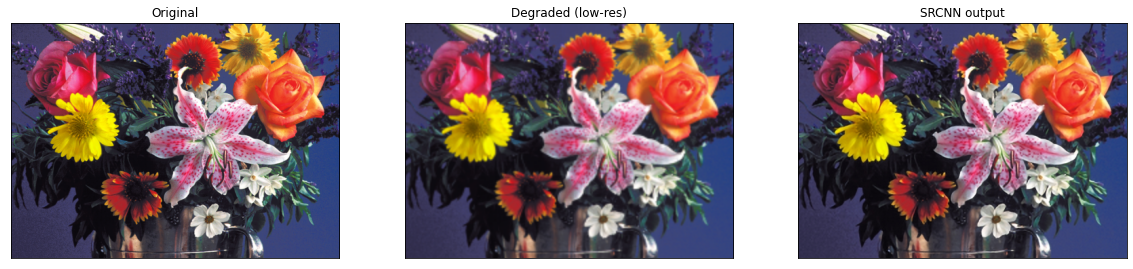

In [42]:
ref, degraded, output, scores = predict('images/flowers.bmp')

# print all scores for all images 
print('Degraded Image: \n PSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2])) ## scores is 2 dimensional with 1st dimension referring to index of degraded(0) or output(1)
print('Reconstructed Image: \n PSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))

# display images as subplots
fig, axs = plt.subplots(1, 3, figsize = (20, 8))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)) ## !! imshow reads RGB images (we had blue channel first above with BGR)
axs[0].set_title('Original')

axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded (low-res)')

axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN output')

# remove the x and y tics
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

In [46]:
# looping through all images

for file in os.listdir('images/'):
    
    # perform super-resolution
    ref, degraded, output, scores = predict('images/{}'.format(file))

    # display images as subplots
    fig, axs = plt.subplots(1, 3, figsize = (20, 8))
    axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)) ## !! imshow reads RGB images (we had blue channel first above with BGR)
    axs[0].set_title('Original')

    axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Degraded (low-res)')
    axs[1].set(xlabel = 'PSNR: {}\nMSE: {}\nSSIM: {}'.format(scores[0][0], scores[0][1], scores[0][2]))
    axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[2].set_title('SRCNN output')
    axs[2].set(xlabel = 'PSNR: {}\nMSE: {}\nSSIM: {}'.format(scores[1][0], scores[1][1], scores[1][2]))

    # remove the x and y tics
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
        
    # save the image
    print('Saving {}'.format(file))
    ## create new directory!
    fig.savefig('output/{}.png'.format(os.path.splitext(file)[0]), facecolor='white', transparent = False) ## splits filename with extension from its extension
    ## save image with white background!
    plt.close() 

C:\Users\mitus\AppData\Local\Temp\ipykernel_67368\2963601828.py:30: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  scores.append(ssim(target, ref, multichannel=True))


Saving baboon.bmp
Saving baby_GT.bmp
Saving barbara.bmp
Saving bird_GT.bmp
Saving butterfly_GT.bmp
Saving coastguard.bmp
Saving comic.bmp
Saving face.bmp
Saving flowers.bmp
Saving foreman.bmp
Saving head_GT.bmp
Saving lenna.bmp
Saving monarch.bmp
Saving pepper.bmp
Saving ppt3.bmp
Saving woman_GT.bmp
Saving zebra.bmp
